In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stats
import re

In [82]:
path = 'C:/Users/Dell/Desktop/example1/classes/2_01-lab-pandas-titanic/'
train = pd.read_csv(path+'train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


1. Create a bar chart showing how many missing values are in each column

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

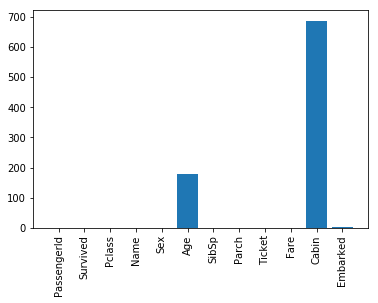

In [35]:
nulls = train.isnull().sum(axis = 0)
plt.bar(train.columns,nulls)
plt.xticks(rotation='vertical')

2. Which column has the most `NaN` values? How many cells in that column are empty? (Note: NaN, empty, and missing are synonymous)

In [42]:
train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin column has the most NaN values

3. Delete all rows where `Embarked` is empty

In [83]:
train = train.dropna(subset=['Embarked'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


4. Fill all empty cabins with **¯\\_(ツ)_/¯**

In [84]:
train['Cabin'] = train['Cabin'].fillna('¯\(ツ)/¯')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3

1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [85]:
train['FamilyCount'] = train['SibSp']+train['Parch'] #Sibsp = no. of siblings, Parch = no. of parents
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4


2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [86]:
train['IsReverend'] = train['Name'].str.contains('Rev.')
train['IsReverend'] = train['IsReverend'].map({True: 1, False: 0})
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,Q,0,0


3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [124]:
# pd.get_dummies(train['Embarked'].unique())
train['Title'] = train['Name'].str.extract(pat = '(\w+\.)')         #extract all characters between a space and a period
train = pd.get_dummies(train, columns=['Embarked','Sex','Title'])   #create dummy columns
train.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis

1. What was the survival rate overall?

In [134]:
print('Overall survival rate:',train.Survived.sum()/train.Survived.count())

Overall survival rate: 0.38245219347581555


2. Which gender fared the worst? What was their survival rate?

In [265]:
print('Female survival rate:',train[(train['Sex_female']==1) & (train['Survived']==1)].shape[0]/train[(train['Sex_female']==1)].shape[0])
print('Male survival rate:',train[(train['Sex_male']==1) & (train['Survived']==1)].shape[0]/train[(train['Sex_male']==1)].shape[0],'->worst')

Female survival rate: 0.7403846153846154
Male survival rate: 0.18890814558058924 ->worst


3. What was the survival rate for each `Pclass`?

In [147]:
# train.groupby('Pclass').count()
# train.head()
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [160]:
print('Class 1 survival rate:',train[(train['Pclass']==1) & (train['Survived']==1)].shape[0]/train[(train['Pclass']==1)].shape[0])
print('Class 2 survival rate:',train[(train['Pclass']==2) & (train['Survived']==1)].shape[0]/train[(train['Pclass']==2)].shape[0])
print('Class 3 survival rate:',train[(train['Pclass']==3) & (train['Survived']==1)].shape[0]/train[(train['Pclass']==3)].shape[0])

Class 1 survival rate: 0.6261682242990654
Class 2 survival rate: 0.47282608695652173
Class 3 survival rate: 0.24236252545824846


4. Did any reverends survive? How many?

In [162]:
print('Reverend survival rate:',train[(train['Title_Rev.']==1) & (train['Survived']==1)].shape[0]/train[(train['Title_Rev.']==1)].shape[0],'-> No survivors')

Reverend survival rate: 0.0 -> No survivors


5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [164]:
print('Cabin ¯\(ツ)/¯ survival rate:',train[(train['Cabin']=='¯\(ツ)/¯') & (train['Survived']==1)].shape[0]/train[(train['Cabin']=='¯\(ツ)/¯')].shape[0])

Cabin ¯\(ツ)/¯ survival rate: 0.29985443959243085


6. What is the survival rate for people whose `Age` is empty?

In [174]:
print('Empty Age survival rate:',train[(train['Age'].isnull()) & (train['Survived']==1)].shape[0]/train[(train['Age'].isnull())].shape[0])

Empty Age survival rate: 0.2937853107344633


7. What is the survival rate for each port of embarkation?

In [176]:
print('Embarked_C survival rate:',train[(train['Embarked_C']==1) & (train['Survived']==1)].shape[0]/train[(train['Embarked_C']==1)].shape[0])
print('Embarked_Q survival rate:',train[(train['Embarked_Q']==1) & (train['Survived']==1)].shape[0]/train[(train['Embarked_Q']==1)].shape[0])
print('Embarked_S survival rate:',train[(train['Embarked_S']==1) & (train['Survived']==1)].shape[0]/train[(train['Embarked_S']==1)].shape[0])

Embarked_C survival rate: 0.5535714285714286
Embarked_Q survival rate: 0.38961038961038963
Embarked_S survival rate: 0.33695652173913043


8. What is the survival rate for children (under 12) in each `Pclass`?

In [179]:
print('Children<12yo, Class 1 survival rate:',train[(train['Age']<12) & (train['Pclass']==1) & (train['Survived']==1)].shape[0]/train[(train['Age']<12) & (train['Pclass']==1)].shape[0])
print('Children<12yo, Class 2 survival rate:',train[(train['Age']<12) & (train['Pclass']==2) & (train['Survived']==1)].shape[0]/train[(train['Age']<12) & (train['Pclass']==2)].shape[0])
print('Children<12yo, Class 3 survival rate:',train[(train['Age']<12) & (train['Pclass']==3) & (train['Survived']==1)].shape[0]/train[(train['Age']<12) & (train['Pclass']==3)].shape[0])

Children<12yo, Class 1 survival rate: 0.75
Children<12yo, Class 2 survival rate: 1.0
Children<12yo, Class 3 survival rate: 0.40425531914893614


9. Did the captain of the ship survive? Is he on the list?

In [182]:
print('Captain survival rate:',train[(train['Title_Capt.']==1) & (train['Survived']==1)].shape[0]/train[(train['Title_Capt.']==1)].shape[0],'-> Capt was on the list but died')

Captain survival rate: 0.0 -> Capt was on the list but died


10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [274]:
train[train['Survived']==0].sort_values('Fare',ascending=False).head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,...,0,0,0,0,0,1,0,0,0,0


11. Does having family on the boat help or hurt your chances of survival?

For those with accompanying family members, those having 1 family member have the highest survival rate.                     The more family members you have, the likelier you'd die.


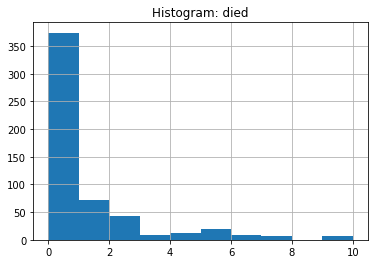

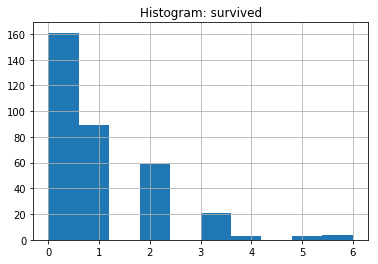

In [259]:
ax1 = train[train['Survived']==0][['FamilyCount']].hist();
ax1 = plt.title('Histogram: died')
ax2 = train[train['Survived']==1][['FamilyCount']].hist();
ax2 = plt.title('Histogram: survived')
print('For those with accompanying family members, those having 1 family member have the highest survival rate. \
                    The more family members you have, the likelier you\'d die.')

In [267]:
train.groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.